<a href="https://colab.research.google.com/github/MTEmr/Turkiyede-Istihdam-Oraninin-Ekonomik-ve-Cevresel-G-stergelerle-Makine-Ogrenmesi-Tabanl-Tahmini/blob/main/T%C3%BCrkiye_Istihdam%C4%B1n%C4%B1n_Prophet_ile_Tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Colab UI (Temporary Upload)

To upload files directly using the Colab interface:

*   Click the **Folder icon** on the left sidebar (usually the second icon from the top).
*   Click the **Upload icon** (an arrow pointing up) within the file browser pane.
*   Select the files from your local computer.

Alternatively, you can drag and drop files directly into the file browser pane.

### 2. Mount Google Drive (Persistent Storage)

This method allows you to access files stored in your Google Drive, and they will persist even if your Colab runtime restarts. You only need to run this code once per session.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# After running this, your Google Drive content will be available at /content/drive/MyDrive/

Mounted at /content/drive


### How to Check if Files are There

Once uploaded or mounted, you can list the files in your current directory or Google Drive to verify their presence:

In [ ]:
# To list files in the current (temporary) session directory:
!ls -F

# To list files in your Google Drive (after mounting):
!ls -F /content/drive/MyDrive

sample_data/
ls: cannot access '/content/drive/MyDrive': No such file or directory


SÜRDÜRÜLEBİLİR KALKINMA PLANLAMASI PROJESİ
SKA 8: İnsana Yakışır İş ve Ekonomik Büyüme

[1/5] Veri yükleniyor...
✓ 14 yıllık veri (2010-2023)

Veri Seti:
     YIL         GSYIH  ISTIHDAM_ORANI  KARBON_EMISYONU
0   2010  17343.719987       46.288170         5.541136
1   2011  19590.858369       48.417505         5.875120
2   2012  20627.440729       48.894435         6.068934
3   2013  22373.136543       49.526770         5.873425
4   2014  24104.984583       49.546825         5.997226
5   2015  25862.850037       50.168627         6.017152
6   2016  26695.909373       50.648358         6.184704
7   2017  28193.061398       51.541017         6.407755
8   2018  28299.469697       51.976445         6.275307
9   2019  28461.326560       50.283475         6.066827
10  2020  28680.085701       47.517958         6.181012
11  2021  31338.379459       50.255398         6.622971
12  2022  39101.038206       52.833480         6.434767
13  2023  42326.144404       53.820185         6.862767

[2/5]

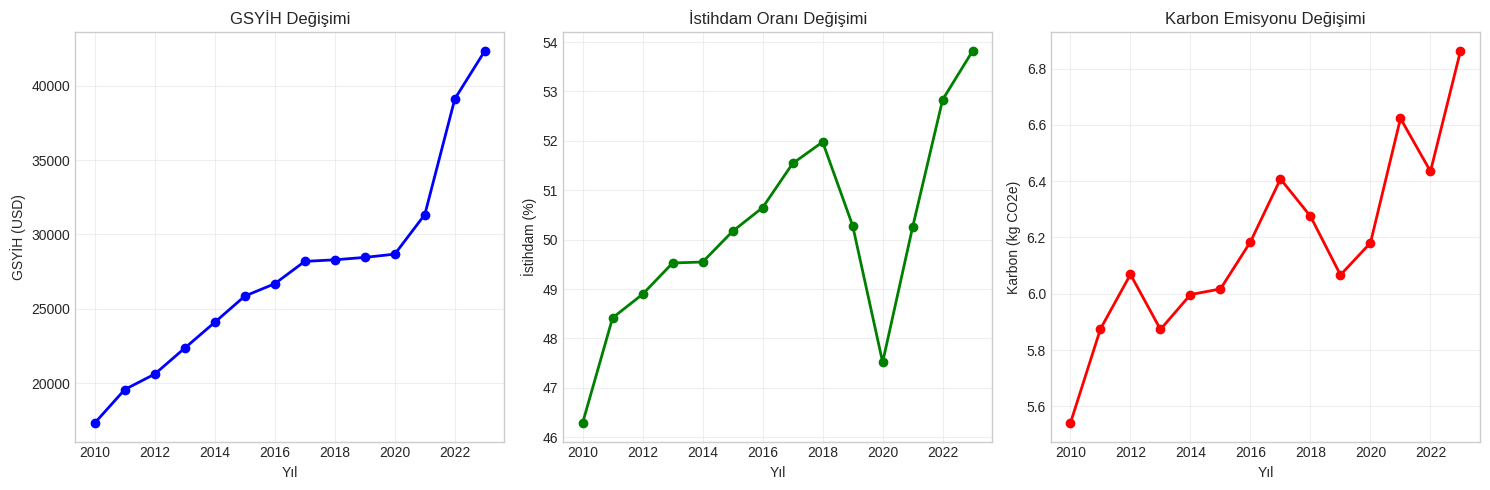

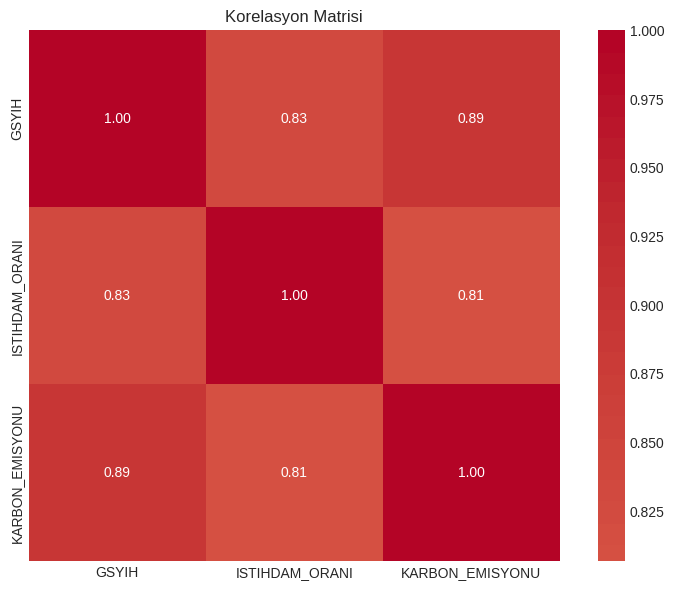


Korelasyon Matrisi:
                    GSYIH  ISTIHDAM_ORANI  KARBON_EMISYONU
GSYIH            1.000000        0.829666         0.890791
ISTIHDAM_ORANI   0.829666        1.000000         0.806893
KARBON_EMISYONU  0.890791        0.806893         1.000000

[3/5] Model eğitiliyor...
✓ Linear Regression modeli eğitildi
  Katsayılar: İstihdam=1088.65, Karbon=13105.15
  Sabit terim: -108095.25

[4/5] Model değerlendiriliyor...

MODEL PERFORMANSI:
R² Score: 0.8288
RMSE: 2767.96 USD
MAE: 2358.45 USD

Değişken Katsayıları:
          Değişken       Katsayı
1  KARBON_EMISYONU  13105.147275
0   ISTIHDAM_ORANI   1088.652592


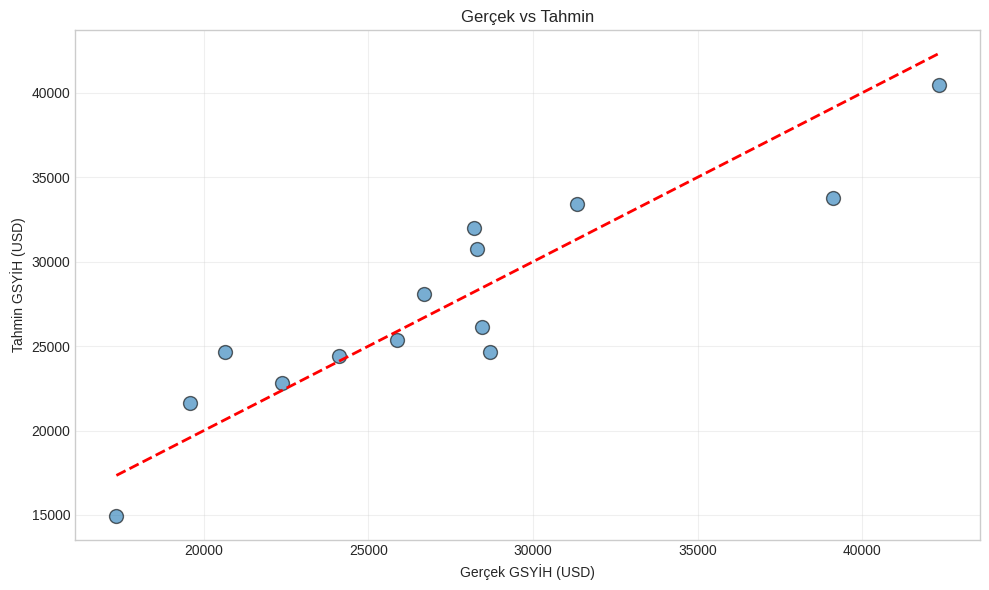


[5/5] Gelecek tahminleri yapılıyor...

GELECEK TAHMİNLERİ (2024-2030):
 Yıl  İstihdam (%)  Karbon (kg)  GSYİH (USD)
2024         52.67         6.70      37007.0
2025         53.01         6.77      38294.0
2026         53.35         6.84      39580.0
2027         53.69         6.91      40867.0
2028         54.03         6.98      42154.0
2029         54.37         7.05      43440.0
2030         54.71         7.12      44727.0


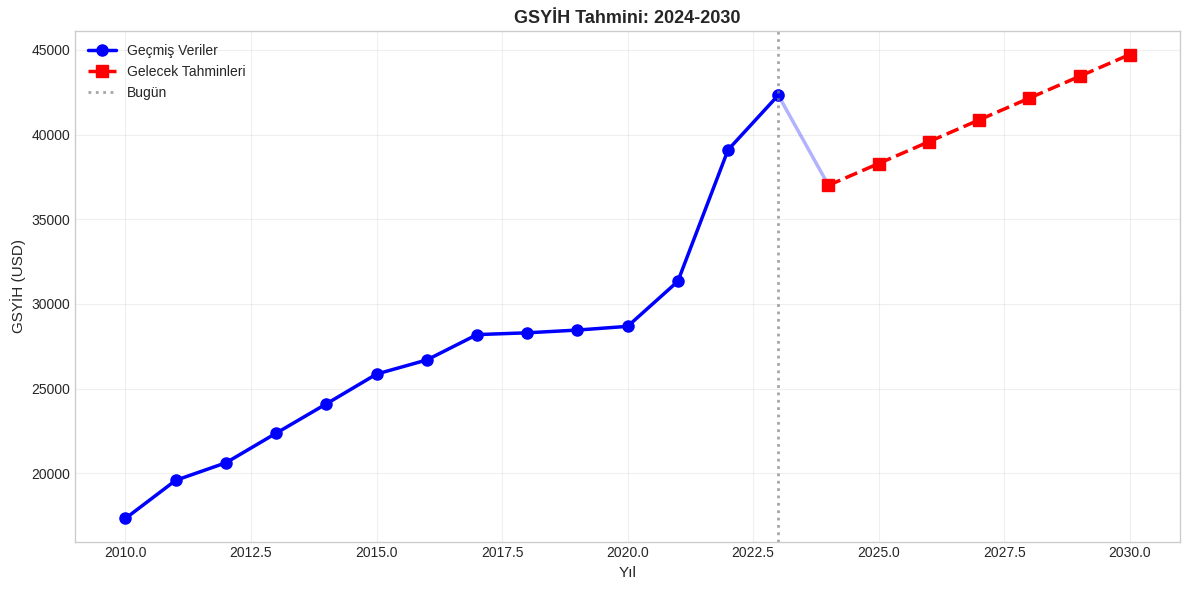


ÖZET RAPOR

1. VERİ: OECD - Türkiye (2010-2023)

2. MODEL: Linear Regression
   - R² Score: 0.8288
   - RMSE: 2767.96 USD
   - Model Denklemi: GSYİH = -108095.25 + 1088.65*İstihdam + 13105.15*Karbon

3. BULGULAR:
   - GSYİH-İstihdam korelasyon: 0.830
   - GSYİH-Karbon korelasyon: 0.891
   - En önemli faktör: KARBON_EMISYONU

4. 2030 TAHMİNİ: $44,727

5. ÖNERİLER:
   ✓ İstihdamı artırıcı politikalar
   ✓ Karbon emisyonunu azaltıcı önlemler
   ✓ Sürdürülebilir ekonomik büyüme

✅ Analiz tamamlandı! Grafikler kaydedildi.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("="*70)
print("SÜRDÜRÜLEBİLİR KALKINMA PLANLAMASI PROJESİ")
print("SKA 8: İnsana Yakışır İş ve Ekonomik Büyüme")
print("="*70)

# =========================================================================
# 1. VERİ YÜKLEME VE BİRLEŞTİRME
# =========================================================================
print("\n[1/5] Veri yükleniyor...")

# GSYİH
file_3 = "/content/drive/MyDrive/OECD.SDD.NAD,DSD_NAMAIN10@DF_TABLE1_EXPENDITURE_HCPC,+A.TUR...B1GQ_POP........csv"
df_gdp = pd.read_csv(file_3)
df_gdp = df_gdp[['TIME_PERIOD', 'OBS_VALUE']].copy()
df_gdp.columns = ['YIL', 'GSYIH']

# İstihdam
file_1 = "/content/drive/MyDrive/OECD.SDD.TPS,DSD_LFS@DF_IALFS_EMP_WAP_Q,+TUR.EMP_WAP.._Z.Y._T.Y15T64..Q.csv"
df_ist = pd.read_csv(file_1)
df_ist = df_ist[['TIME_PERIOD', 'OBS_VALUE']].copy()
df_ist.columns = ['YIL_CEYREK', 'ISTIHDAM_ORANI']
df_ist['YIL'] = df_ist['YIL_CEYREK'].apply(lambda x: int(x.split('-')[0]))
df_ist = df_ist.groupby('YIL')['ISTIHDAM_ORANI'].mean().reset_index()

# Karbon
file_2 = "/content/drive/MyDrive/OECD.ENV.EPI,DSD_AIR_GHG@DF_AIR_GHG,+TUR.A.GHG._T.KG_CO2E_PS.csv"
df_kar = pd.read_csv(file_2)
df_kar = df_kar[['TIME_PERIOD', 'OBS_VALUE']].copy()
df_kar.columns = ['YIL', 'KARBON_EMISYONU']

# Birleştir
df = pd.merge(df_gdp, df_ist, on='YIL')
df = pd.merge(df, df_kar, on='YIL')
df = df.sort_values('YIL').reset_index(drop=True)

print(f"✓ {len(df)} yıllık veri ({df['YIL'].min()}-{df['YIL'].max()})")
print("\nVeri Seti:")
print(df)

# =========================================================================
# 2. VERİ GÖRSELLEŞTİRME
# =========================================================================
print("\n[2/5] Grafikler oluşturuluyor...")

# Zaman serisi grafikleri
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(df['YIL'], df['GSYIH'], marker='o', linewidth=2, color='blue')
axes[0].set_title('GSYİH Değişimi')
axes[0].set_xlabel('Yıl')
axes[0].set_ylabel('GSYİH (USD)')
axes[0].grid(True, alpha=0.3)

axes[1].plot(df['YIL'], df['ISTIHDAM_ORANI'], marker='o', linewidth=2, color='green')
axes[1].set_title('İstihdam Oranı Değişimi')
axes[1].set_xlabel('Yıl')
axes[1].set_ylabel('İstihdam (%)')
axes[1].grid(True, alpha=0.3)

axes[2].plot(df['YIL'], df['KARBON_EMISYONU'], marker='o', linewidth=2, color='red')
axes[2].set_title('Karbon Emisyonu Değişimi')
axes[2].set_xlabel('Yıl')
axes[2].set_ylabel('Karbon (kg CO2e)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('grafik_1_zaman_serisi.png', dpi=300)
plt.show()

# Korelasyon
korelasyon = df[['GSYIH', 'ISTIHDAM_ORANI', 'KARBON_EMISYONU']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(korelasyon, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.savefig('grafik_2_korelasyon.png', dpi=300)
plt.show()

print("\nKorelasyon Matrisi:")
print(korelasyon)

# =========================================================================
# 3. MODEL EĞİTİMİ (Linear Regression)
# =========================================================================
print("\n[3/5] Model eğitiliyor...")

# Tüm veriyi kullan
X = df[['ISTIHDAM_ORANI', 'KARBON_EMISYONU']]
y = df['GSYIH']

# Linear Regression Modeli
model = LinearRegression()
model.fit(X, y)

# Tahminler
y_pred = model.predict(X)

print(f"✓ Linear Regression modeli eğitildi")
print(f"  Katsayılar: İstihdam={model.coef_[0]:.2f}, Karbon={model.coef_[1]:.2f}")
print(f"  Sabit terim: {model.intercept_:.2f}")

# =========================================================================
# 4. MODEL PERFORMANSI
# =========================================================================
print("\n[4/5] Model değerlendiriliyor...")

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print("\nMODEL PERFORMANSI:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f} USD")
print(f"MAE: {mae:.2f} USD")

# Özellik önemi (Linear Regression için katsayılar)
onem = pd.DataFrame({
    'Değişken': X.columns,
    'Katsayı': model.coef_,
    'Mutlak Etki': np.abs(model.coef_)
}).sort_values('Mutlak Etki', ascending=False)

print("\nDeğişken Katsayıları:")
print(onem[['Değişken', 'Katsayı']])

# Gerçek vs Tahmin
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, s=100, alpha=0.6, edgecolors='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Gerçek GSYİH (USD)')
plt.ylabel('Tahmin GSYİH (USD)')
plt.title('Gerçek vs Tahmin')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('grafik_3_gercek_vs_tahmin.png', dpi=300)
plt.show()

# =========================================================================
# 5. GELECEK TAHMİNİ (2024-2030)
# =========================================================================
print("\n[5/5] Gelecek tahminleri yapılıyor...")

# Basit lineer trend
yillar = df['YIL'].values
ist_trend = np.polyfit(yillar, df['ISTIHDAM_ORANI'].values, 1)
kar_trend = np.polyfit(yillar, df['KARBON_EMISYONU'].values, 1)

gelecek_yil = np.arange(2024, 2031)
gelecek_ist = np.polyval(ist_trend, gelecek_yil)
gelecek_kar = np.polyval(kar_trend, gelecek_yil)

X_gelecek = pd.DataFrame({
    'ISTIHDAM_ORANI': gelecek_ist,
    'KARBON_EMISYONU': gelecek_kar
})

gelecek_gsyih = model.predict(X_gelecek)

# Tablo
tahmin_tablo = pd.DataFrame({
    'Yıl': gelecek_yil,
    'İstihdam (%)': gelecek_ist.round(2),
    'Karbon (kg)': gelecek_kar.round(2),
    'GSYİH (USD)': gelecek_gsyih.round(0)
})

print("\nGELECEK TAHMİNLERİ (2024-2030):")
print(tahmin_tablo.to_string(index=False))

# Grafik
plt.figure(figsize=(12, 6))

# Geçmiş veriler
plt.plot(df['YIL'], df['GSYIH'], 'o-', linewidth=2.5, markersize=8,
         label='Geçmiş Veriler', color='blue')

# Geçiş noktası (son yıl + ilk tahmin)
plt.plot([df['YIL'].iloc[-1], gelecek_yil[0]],
         [df['GSYIH'].iloc[-1], gelecek_gsyih[0]],
         'o-', linewidth=2.5, markersize=8, color='blue', alpha=0.3)

# Gelecek tahminler
plt.plot(gelecek_yil, gelecek_gsyih, 's--', linewidth=2.5, markersize=8,
         label='Gelecek Tahminleri', color='red')

plt.axvline(x=2023, color='gray', linestyle=':', linewidth=2, alpha=0.7, label='Bugün')
plt.xlabel('Yıl', fontsize=11)
plt.ylabel('GSYİH (USD)', fontsize=11)
plt.title('GSYİH Tahmini: 2024-2030', fontsize=13, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('grafik_4_gelecek_tahmin.png', dpi=300)
plt.show()

# =========================================================================
# SONUÇ RAPORU
# =========================================================================
print("\n" + "="*70)
print("ÖZET RAPOR")
print("="*70)
print(f"\n1. VERİ: OECD - Türkiye ({df['YIL'].min()}-{df['YIL'].max()})")
print(f"\n2. MODEL: Linear Regression")
print(f"   - R² Score: {r2:.4f}")
print(f"   - RMSE: {rmse:.2f} USD")
print(f"   - Model Denklemi: GSYİH = {model.intercept_:.2f} + {model.coef_[0]:.2f}*İstihdam + {model.coef_[1]:.2f}*Karbon")
print(f"\n3. BULGULAR:")
print(f"   - GSYİH-İstihdam korelasyon: {korelasyon.loc['GSYIH', 'ISTIHDAM_ORANI']:.3f}")
print(f"   - GSYİH-Karbon korelasyon: {korelasyon.loc['GSYIH', 'KARBON_EMISYONU']:.3f}")
print(f"   - En önemli faktör: {onem.iloc[0]['Değişken']}")
print(f"\n4. 2030 TAHMİNİ: ${gelecek_gsyih[-1]:,.0f}")
print(f"\n5. ÖNERİLER:")
print("   ✓ İstihdamı artırıcı politikalar")
print("   ✓ Karbon emisyonunu azaltıcı önlemler")
print("   ✓ Sürdürülebilir ekonomik büyüme")
print("\n" + "="*70)
print("✅ Analiz tamamlandı! Grafikler kaydedildi.")
print("="*70)